In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.odr import *
from scipy import linalg
from scipy import stats
from scipy import optimize
import time
from tqdm.notebook import tqdm
All = pd.read_csv(r'C:/Users/wlsdl/OneDrive/바탕 화면/Jin/White Dwarf/all.txt',delim_whitespace=True,header=0)
plt.rcParams['font.size'] = '16'
T,R,M,Rerr, Merr,Terr = All['Teff'].to_numpy(),All['Radius'].to_numpy() ,All['Mass'].to_numpy() ,All['Rerr'].to_numpy() ,All['Merr'].to_numpy(),All['Terr'].to_numpy()
g = All['g_mag'].to_numpy()

Object = All['Object'].to_numpy()

Ts = 5800  # K ,Sun effective temperature 

log_R =np.log10(R)   # Radius of white dwarf represented by sun radius
log_M = np.log10(M)  # Mass of white dwarf represented by sun mass
log_T = np.log10(T)   # Temperature of white dwarf 

logR_err = (1/np.log(10))*(Rerr/R)   

logM_err =(1/np.log(10))*(Merr/M)
logT_err = (1/np.log(10))*(Terr/T)

h_bar = 1.054e-34  # m^2 kg / s ,Plank cons / 2 pi
G = 6.6743e-11       # m^3 /kg / s^2 , Gravitational cons
me = 9.109387e-31  # Kg , Electron mass
mp = 1.6726e-27   # Kg , Proton mass
pi = np.pi
m_s = 1.9884e30   #Kg , Sun mass 
r_s =  696340e3   # m, Sun radius
ev = 6.242e18 #J -> eV
kb_J = 1.38e-23
kb_eV = 8.6173303e-5 

kk_e = ((81*pi**2*h_bar**6)/(16*G**3*me**3))**(1/3)  # constant  
kk_p = ((81*pi**2*h_bar**6)/(16*G**3*mp**3))**(1/3)

#  Color map according to Temperature

0.010271846739702589


C:\Users\wlsdl\AppData\Local\Temp\ipykernel_20272\906837073.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('rainbow')


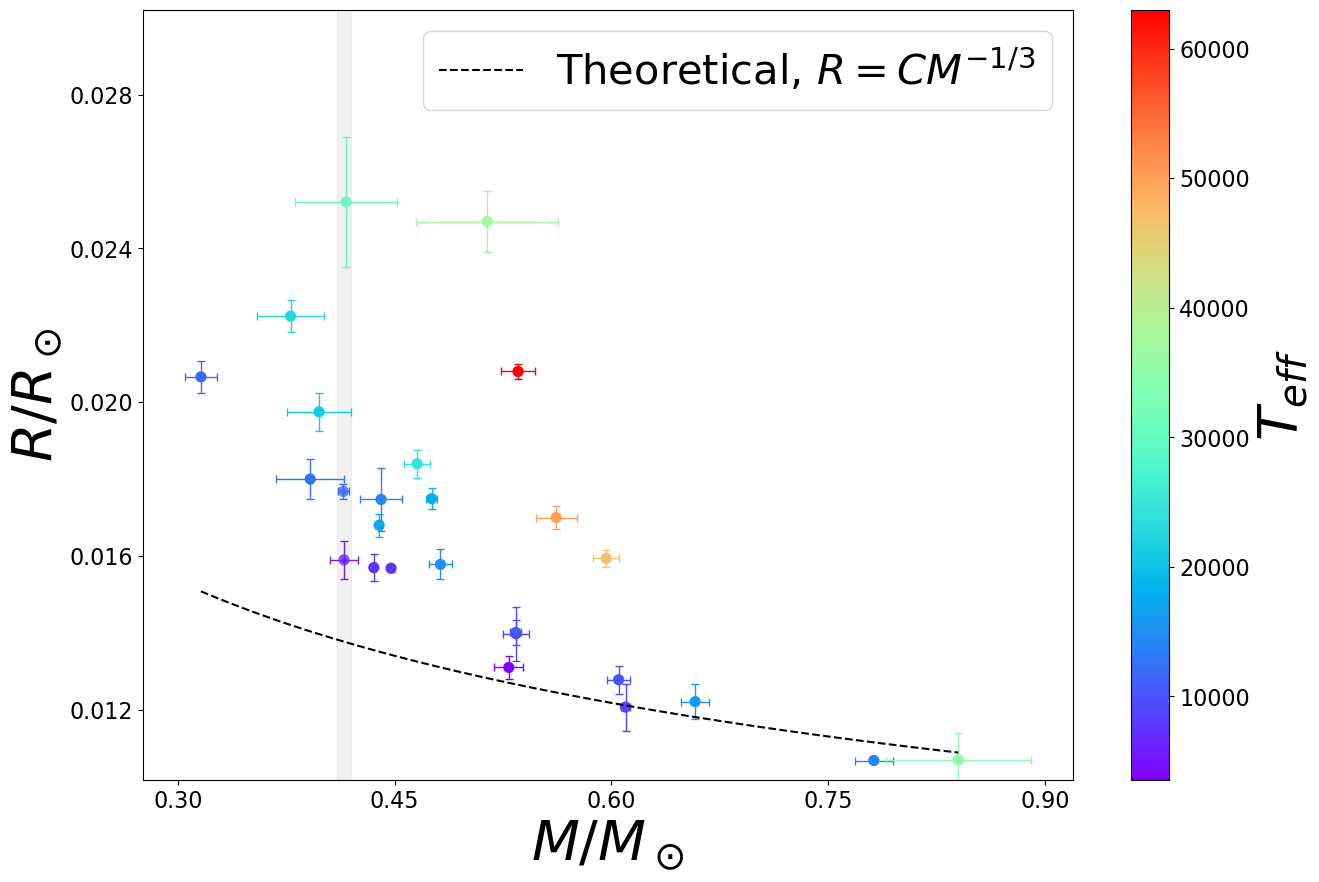

In [2]:
#convert time to a color tuple using the colormap used for scatter
fig = plt.figure(1,figsize=(15,10))


import matplotlib
import matplotlib.cm as cm
norm = matplotlib.colors.Normalize(vmin=min(T), vmax=max(T), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
time_color = np.array([(mapper.to_rgba(v)) for v in T])

#loop over each data point to plot
for x, y, Me,Re,color in zip(M, R, Merr, Rerr,time_color):
    plt.plot(x, y, '.', color=color)
    plt.errorbar(x, y, xerr= Me,yerr=Re ,lw=1, capsize=3, color=color)

cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(M, R, c=T, vmin=T.min(), vmax=T.max(), s=50, cmap=cm)

colorbar = plt.colorbar(sc)
label = colorbar.set_label('$T_{eff}$', size=40) 
plt.xlabel(r"$M / M_\odot$",fontsize=40)
plt.ylabel(r'$R/R_\odot$',fontsize=40)
plt.ylim(R.min()-0.0005 , R.max()+0.005)
plt.yticks(np.linspace(0.012,0.028,5))
plt.xticks(np.arange(0.3,0.9,0.15))

def EOS(m,z):
    aa = (m_s)**(-1/3) / r_s
    pp = aa*kk_e*mp**(-5/3)
    k = pp*z**(5/3)
    print(k)
    return k * m **(-1/3)
xx = np.linspace(M.min(),M.max(),100)
yy_th = EOS(xx,0.5) 
# yy_th = 0.01 *(xx)**(-1/3)
plt.plot(xx,yy_th,'k--',label=r'Theoretical, $R = C M^{-1/3}$')

# yy_th = EOS(kk_p,xx,0.5) 
# yy_th = 0.01 *(xx)**(-1/3)
# plt.plot(xx,yy_th,'k:',label=r'Theoretical, $R = C M^{-1/3}$')


xx_g = np.linspace(0.41,0.42,100)

legend = plt.legend(fontsize=30,loc='upper right')
plt.fill_between(xx_g, R.min()-0.0005, R.max()+0.005, color='lightgray', alpha=0.3)

# plt.savefig("/home/jin/바탕화면/Theorical expected")

#  Compare Origin and R-M estimation

0.010271846739702589
0.010271846739702589
chi2 =  0.4124557212201344


C:\Users\wlsdl\AppData\Local\Temp\ipykernel_20272\4004336488.py:94: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


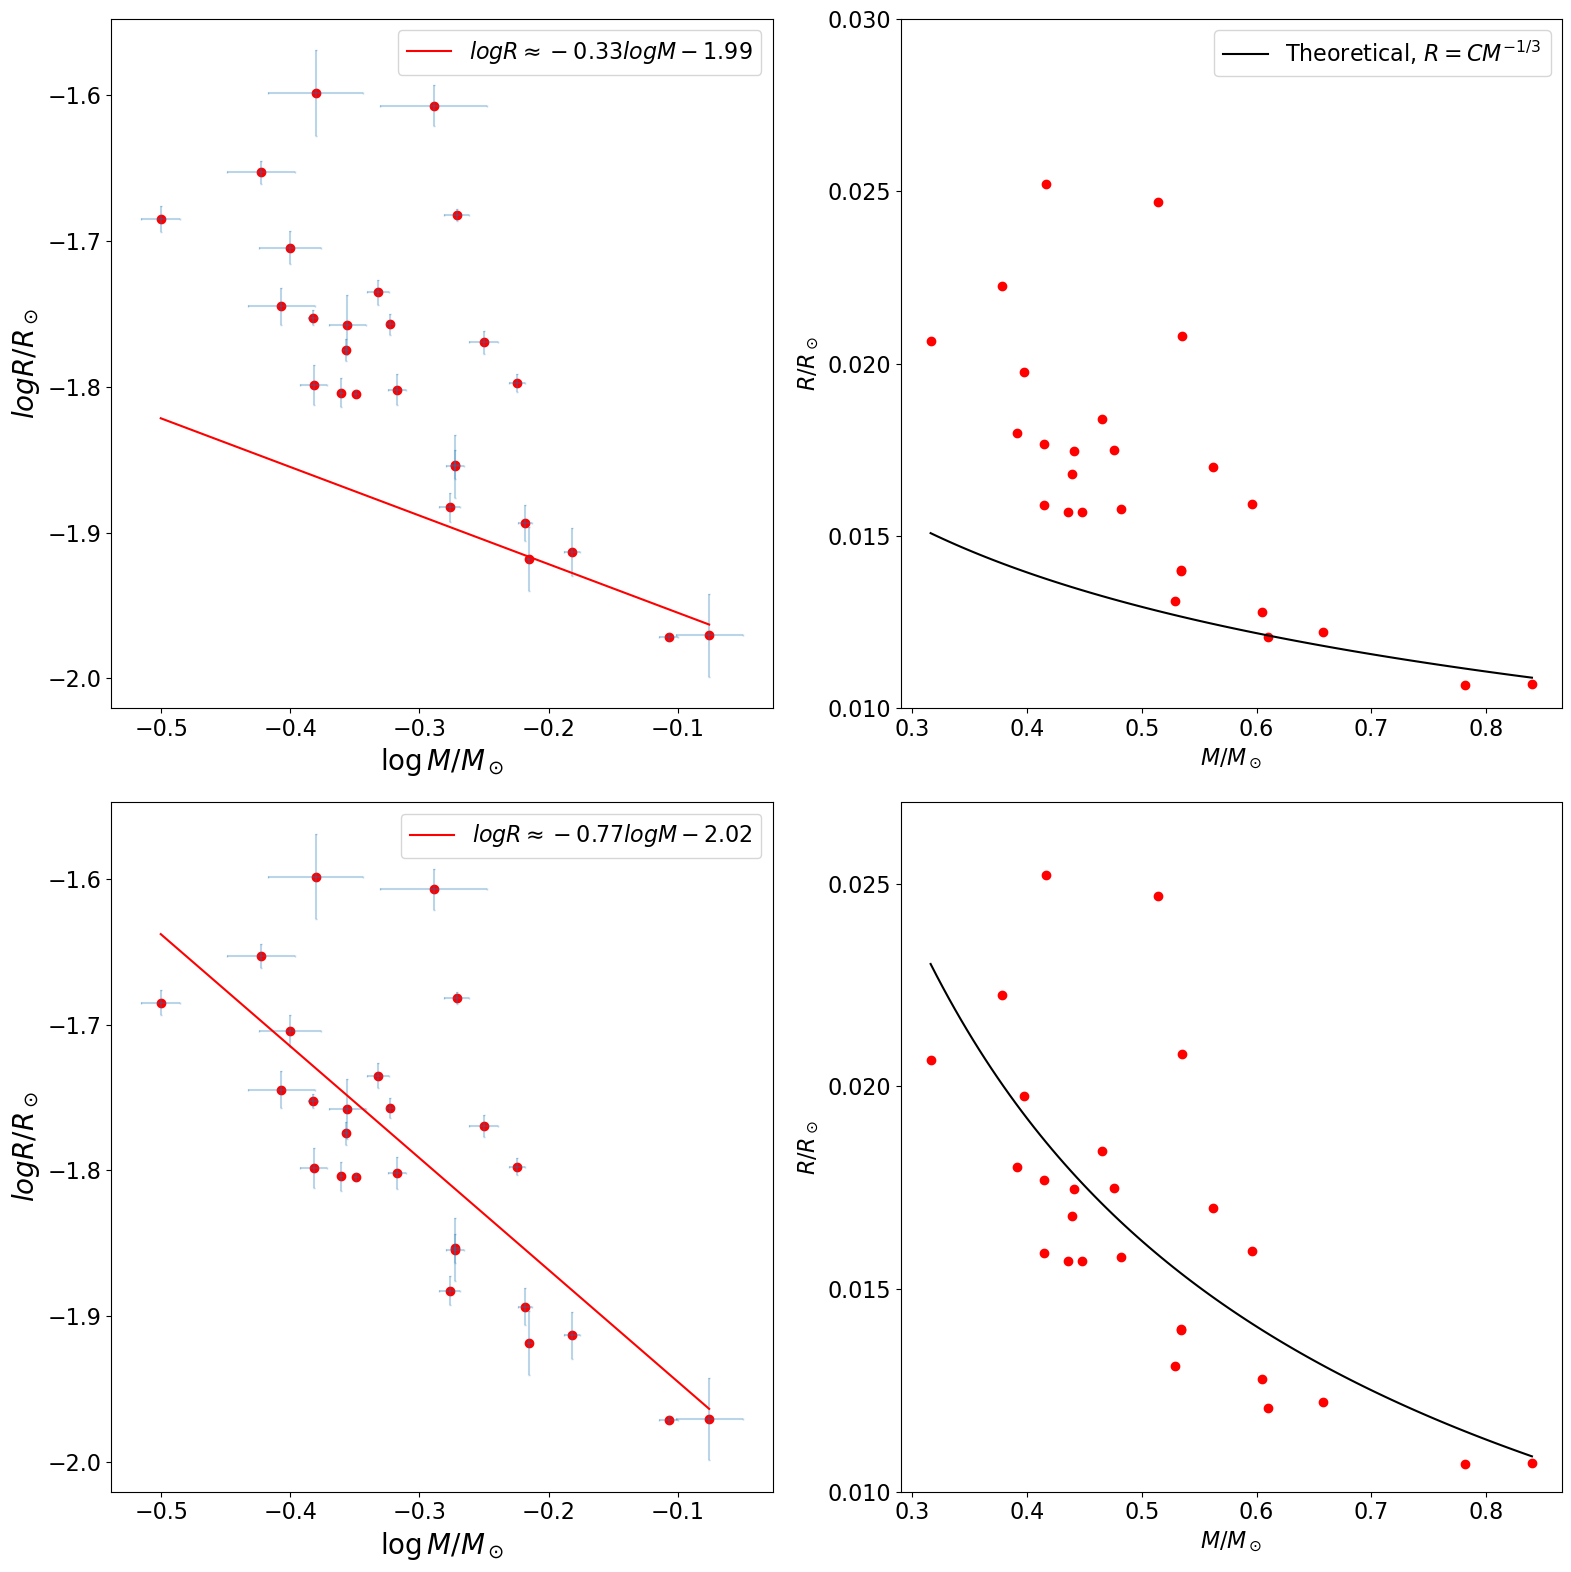

In [3]:
fig = plt.figure(1,figsize=(16,16))


# First, estimating this data relationship between radius and mass
# Using LS estimation
def func(p,x):
  return p[0] + p[1]*x   
A = np.vstack([log_M, np.ones(len(log_M))]).T
B = log_R
M_1,chi2,ransk,s = linalg.lstsq(A,B)
xx = np.linspace(log_M.min(),log_M.max(),100)
r1 = xx*M_1[0] + M_1[1]


# Log
plt.subplot(223)
plt.plot(log_M,log_R,'ro')
plt.errorbar(x=log_M,y=log_R,xerr =logM_err,yerr=logR_err,ls='',capsize=0.5,alpha=0.3)
plt.plot(xx,r1,'r-',label=r'$log R \approx {:.2f}logM  {:.2f}$'.format(M_1[0],M_1[1]))

plt.xlabel(r'$\log M/M_\odot  $',fontsize=20)
plt.ylabel(r'$log R/R_\odot$',fontsize=20)  

plt.legend()


# Original
plt.subplot(224)
xx = np.linspace(M.min(),M.max(),100)
R_M = 10**M_1[1]*xx**(M_1[0])
plt.plot(xx,R_M,'k-')
plt.plot(M,R,'ro')
plt.xlabel(r'$M/M_\odot$')
plt.ylabel(r'$R/R_\odot$')
plt.yticks([0.01,0.015,0.020,0.025,0.03])
plt.ylim(0.01,0.027)
plt.tight_layout()




#Second, Origine relationship R~ M ^(-1/3)

h_bar = 1.054e-34  # m^2 kg / s ,Plank cons / 2 pi
G = 6.6743e-11       # m^3 /kg / s^2 , Gravitational cons
me = 9.109387e-31  # Kg , Electron mass
mp = 1.6726e-27   # Kg , Proton mass
pi = np.pi
m_s = 1.9884e30   #Kg , Sun mass 
r_s =  696340e3   # m, Sun radius

kk = ((81*pi**2*h_bar**6)/(16*G**3*me**3))**(1/3)  # constant  

# Theoretical Equation of radius 
def EOS(m,z):
    aa = (m_s)**(-1/3) / r_s
    pp = aa*kk_e*mp**(-5/3)
    k = pp*z**(5/3)
    print(k)
    return k * m **(-1/3)

# Log
plt.subplot(222)


plt.scatter(M, R,c='r')
plt.xlabel(r"$M / M_\odot$")
plt.ylabel(r'$R/R_\odot$')
plt.ylim(R.min()-0.0005 , R.max()+0.001)
plt.yticks([0.01,0.015,0.020,0.025,0.03])
# plt.xticks(np.arange(0.3,0.9,0.15))


xx = np.linspace(M.min(),M.max(),100)
yy_th = EOS(xx,0.5)   # ratio of proton and Atomic numer 0.5 = ratio of proton and neutron 1
# yy_th = 0.01 *(xx)**(-1/3)
plt.plot(xx,yy_th,'k-',label=r'Theoretical, $R = C M^{-1/3}$')
yy_t = np.log10(EOS(M,0.5)) 
chi2 = np.sum((log_R - yy_t)**2)
print('chi2 = ',chi2)
plt.legend()


# Original
plt.subplot(221)
plt.plot(log_M,log_R,'ro')
plt.errorbar(x=log_M,y=log_R,xerr =logM_err,yerr=logR_err,ls='',capsize=0.5,alpha=0.3)
plt.plot(np.log10(xx),np.log10(yy_th),'r-',label=r'$log R \approx {:.2f}logM  {:.2f}$'.format(-1/3 , np.log10(0.010271846739702589)))

plt.xlabel(r'$\log M/M_\odot  $',fontsize=20)
plt.ylabel(r'$log R/R_\odot$',fontsize=20)  

plt.legend()
plt.tight_layout()


# STD result

In [4]:
R_th = EOS(M,0.5) 
STD_th = np.std(np.log10(R_th)-log_R)

log_R_M_0 = log_M*M_1[0] + M_1[1]
STD_0 = np.std(log_R_M_0-log_R)

print("STD of theoretical is = ",STD_th)
print('*'*50)
print("STD of LS estimation  is = ",STD_0)

0.010271846739702589
STD of theoretical is =  0.078087194882132
**************************************************
STD of LS estimation  is =  0.06619478163417124


#  Model 1

$R \approx M (T/T_0)^\beta$

0.01791611330873564
[ 0.19025788 -0.87775287 -2.85475356]
[-2.85475355 -0.87775288  0.19025788]
0.033577128521322615


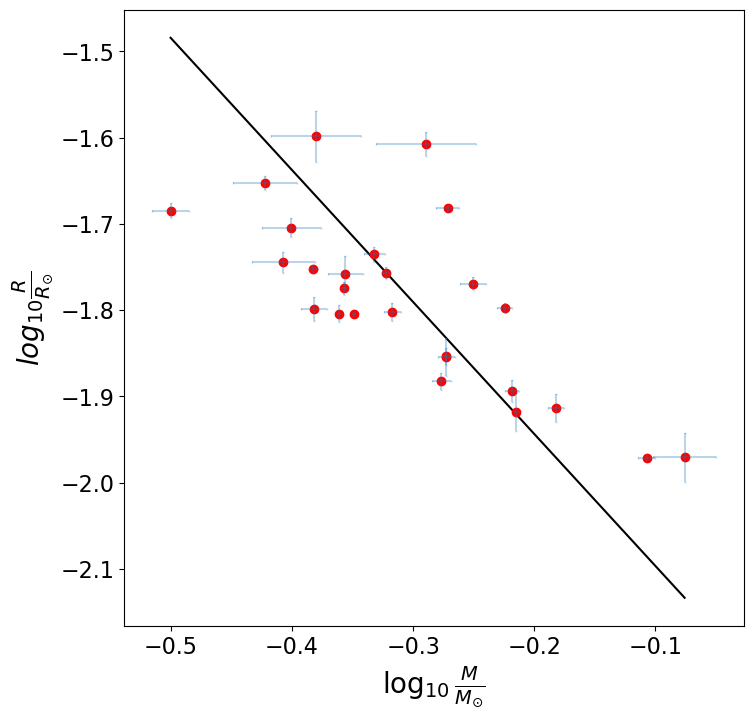

In [5]:
fig = plt.figure(1,figsize=(8,8))
x = np.row_stack((log_M,log_T))
xx = np.linspace(log_M.min() , log_M.max(),100)
tt = np.linspace(log_T.max() , log_T.min(),100)


# Constant 안에 T0 값이 포함되어 있음.
def linfit(beta,x):
    return beta[0] + beta[1]*x[0] + beta[2]*x[1]
linmod = Model(linfit)
data = RealData(x,log_R)
odr = ODR(data,linmod,beta0=[0.5,0.5,1.])


out=odr.run()
ch = out.sum_square
print(ch)
plt.xlabel(r'$\log_{10} \frac{M}{M_{\odot}}$',fontsize=20)
plt.ylabel(r'$log_{10}\frac{R}{R_{\odot}}$',fontsize=20)  
a_all_Model1,b_M_all_Model1,c_T_all_Model1 = out.beta


yy_R1= a_all_Model1 +b_M_all_Model1*xx + c_T_all_Model1*tt

log_R1 =  a_all_Model1 +b_M_all_Model1*log_M + c_T_all_Model1*log_T

plt.plot(xx,yy_R1,'k')
plt.plot(log_M,log_R,'ro',label=r'$logR \propto \alpha logM + \beta logT , (\alpha,\beta) = ({:.2f},{:.2f}) $'.format(b_M_all_Model1,c_T_all_Model1))
plt.errorbar(x=log_M,y=log_R,xerr =logM_err,yerr=logR_err,ls='',capsize=0.5,alpha=0.3)


def test(X,a,b,c):
    x, y = X
    return c + b*x + a*y
aa,bb = optimize.curve_fit(test, (log_M,log_T), log_R)
print(aa)

def func(p,x):
  return p[0] + p[1]*x[0]+p[2]*x[1]   
A = np.vstack([np.ones(len(log_M)),log_M,log_T]).T
B = log_R
M_2,chi2,ransk,s = linalg.lstsq(A,B)
logpp = M_2[0] + M_2[1]*log_M + M_2[2]*log_T
xx = np.linspace(log_M.min(),log_M.max(),100)
print(M_2)
print(chi2)

# 지금부턴 ODR을 쓸 것임, ODR과 차이도 안나면서, 어떤 메커니즘인지 잘 알고 많이 사용해봤기 때문.



#plt.savefig('Model 2 ',dpi=400)

In [6]:
cc = np.sum ((log_R - log_R1)**2 / logR_err)
print(cc)



2.981957309729828


In [7]:
# fig = plt.figure(1,figsize=(10,8))
# # camera = Camera(fig)
# # fig = plt.figure(1,figsize=(6,6))

# N = 1000
# x = np.row_stack((log_M,T))
# TT = np.logspace(-5,5,N)

# # BIn
# c_T_all_Model1 = np.zeros(N)
# cc = np.linspace(0,1,N)
# b_M_all_Model1 = np.zeros(N)
# resM1 = np.zeros((N,N))
# resM1_Min = np.zeros(N)
# beta1 = np.zeros(N)
# a_all_Model1 = np.zeros(N)



# for ii, t0 in tqdm(enumerate(TT)):
    
    
#     def linfit(beta,x):
#         return beta[0] + beta[1]*x[0] + beta[2]*np.log10(x[1]/t0)
#     linmod = Model(linfit)
#     data = RealData(x,log_R)
#     odr = ODR(data,linmod,beta0=[0.0,0.0,0.0])
#     out=odr.run()
#     a_all_Model1[ii],b_M_all_Model1[ii],c_T_all_Model1[ii] = out.beta
#     for jj, beta in enumerate(cc):
#         R_test = np.log10(R/(T/t0)**(beta))
#         resM1[ii,jj] = np.sum((np.log10(R) -beta*np.log10(T/t0) - b_M_all_Model1[ii]*log_M - a_all_Model1[ii])**2/(logR_err**2))
#     plt.xlabel(r'$\beta$',fontsize=30)
#     plt.ylabel(r"$\chi^2$",fontsize=30)
#     plt.yticks(np.linspace(2.5,4.5,5))
#     plt.ylabel(r" $\chi^2$")
#     plt.plot(cc,resM1[ii,:])
#     bb = resM1[ii,:].argmin()
#     resM1_Min[ii] = resM1[ii,bb]
#     beta1[ii] = cc[bb]
#     plt.plot(cc[bb],resM1[ii,bb],'bo') 
# #     plt.text(0.02,0.10,s='T = {:.4f}'.format(t0)) # animation start 
# #     plt.tight_layout()
# #     camera.snap()  # 애니메이션에 추가
# #     fig # animation end
# tt = np.unravel_index(resM1.argmin(),resM1.shape)
# uu_1 , beta0_1 = tt
# plt.plot(cc[beta0_1], resM1[uu_1,beta0_1],'r.') # ,label=r'$T_0$ = {:.2f}'.format(TT[uu])
# # plt.legend()
# plt.ylim(310,330)
# print('Chi2  =  ',resM1[uu_1,beta0_1])
# print('-'*50)
# print('beta of using \'for \'   =  ',cc[beta0_1] )
# print('-'*50)
# print('beta of using \' best fit \'   =  ',c_T_all_Model1[uu_1] )
# print('-'*50)
# print('alpha   =  ',b_M_all_Model1[uu_1])
# print('-'*50)
# print('T0 = ',TT[uu_1])
# print('-'*50)
# print('R0   =  ',a_all_Model1[uu_1])

# # plt.savefig("/home/jin/바탕화면/Relation 1 사진",bbox_inches = 'tight')

0it [00:00, ?it/s]

Chi2  =   0.018275147914433625
--------------------------------------------------
beta of using 'for '   =   0.19519519519519518
--------------------------------------------------
alpha   =   -0.9541765581016037
--------------------------------------------------
T0 =  0.6528521141127848
--------------------------------------------------
R0   =   -2.934937310239413


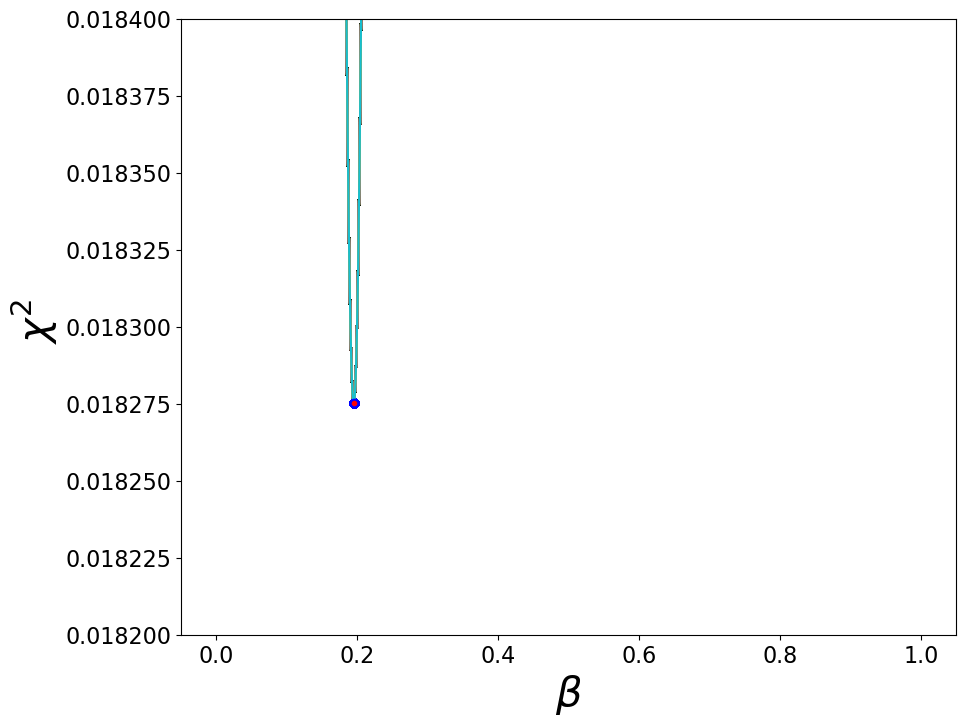

In [8]:
fig = plt.figure(1,figsize=(10,8))
# camera = Camera(fig)
# fig = plt.figure(1,figsize=(6,6))

N = 1000
x = np.row_stack((log_M,T))
TT = np.logspace(-5,5,N)

# BIn
c_T_all_Model1 = np.zeros(N)
cc = np.linspace(0,1,N)
b_M_all_Model1 = np.zeros((N,N))
resM1 = np.zeros((N,N))
resM1_Min = np.zeros(N)
beta1 = np.zeros(N)
a_all_Model1 = np.zeros((N,N))



for ii, t0 in tqdm(enumerate(TT)):
    for jj, be in enumerate(cc):
        def linfit(beta,x):
            return beta[0] + beta[1]*x[0] + be*np.log10(x[1]/t0)
        linmod = Model(linfit)
        data = RealData(x,log_R)
        odr = ODR(data,linmod,beta0=[0.0,0.0])
        out=odr.run()
        a_all_Model1[ii,jj],b_M_all_Model1[ii,jj] = out.beta
        resM1[ii,jj] = out.sum_square
    plt.xlabel(r'$\beta$',fontsize=30)
    plt.ylabel(r"$\chi^2$",fontsize=30)
    # plt.yticks(np.linspace(2.5,4.5,5))
    plt.ylabel(r" $\chi^2$")
    plt.plot(cc,resM1[ii,:])
    bb = resM1[ii,:].argmin()
    resM1_Min[ii] = resM1[ii,bb]
    beta1[ii] = cc[bb]
    plt.plot(cc[bb],resM1[ii,bb],'bo') 
#     plt.text(0.02,0.10,s='T = {:.4f}'.format(t0)) # animation start 
#     plt.tight_layout()
#     camera.snap()  # 애니메이션에 추가
#     fig # animation end
tt = np.unravel_index(resM1.argmin(),resM1.shape)
uu_1 , beta0_1 = tt
plt.plot(cc[beta0_1], resM1[uu_1,beta0_1],'r.') # ,label=r'$T_0$ = {:.2f}'.format(TT[uu])
# plt.legend()
plt.ylim(0.0182,0.0184)
print('Chi2  =  ',resM1[uu_1,beta0_1])
print('-'*50)
print('beta of using \'for \'   =  ',cc[beta0_1] )
print('-'*50)
# print('beta of using \' best fit \'   =  ',c_T_all_Model1[uu_1] )
# print('-'*50)
print('alpha   =  ',b_M_all_Model1[uu_1,beta0_1])
print('-'*50)
print('T0 = ',TT[uu_1])
print('-'*50)
print('R0   =  ',a_all_Model1[uu_1,beta0_1])

# plt.savefig("/home/jin/바탕화면/Relation 1 사진",bbox_inches = 'tight')

In [9]:
Rdot_1 = 10**(a_all_Model1[uu_1,beta0_1])*M**(b_M_all_Model1[uu_1,beta0_1])*(T/TT[uu_1])**(beta1[uu_1])
Rnew_1 = R/(T/TT[uu_1])**(beta1[uu_1])


R1= R/((T/TT[uu_1])**(beta1[uu_1]))

# Model 2

In [10]:
# fig = plt.figure(1,figsize=(10,10))
# # camera = Camera(fig)
# x = np.row_stack((log_M,T))

# N = 1000
# TT = np.logspace(-5,5,N)
# c_T_all_Model2 = np.zeros(N)
# cc = np.linspace(0,1,N)
# b_M_all_Model2 = np.zeros(N)
# resM2 = np.zeros((N,N))
# a_all_Model2 = np.zeros(N)
# resM2_Min = np.zeros(N)

# beta2 = np.zeros(N)
# zz = 0
# for ii, t0 in tqdm(enumerate(TT)):
#     def linfit(beta,x):
#         return beta[0] + beta[1]*x[0] + beta[2]*np.log10(1+x[1]/t0)
#     linmod = Model(linfit)
#     data = RealData(x,log_R)
#     odr = ODR(data,linmod,beta0=[1.,1.,1.])
#     out=odr.run()
#     a_all_Model2[ii],b_M_all_Model2[ii],c_T_all_Model2[ii] = out.beta
#     zz += 1
#     for jj, beta in enumerate(cc):
#         R_test = np.log10(R/(1+T/t0)**(beta))
#         resM2[ii,jj] = np.std(R_test -b_M_all_Model2[ii]*log_M)
#     if (zz % 20) == 0:        
#         plt.plot(cc,resM2[ii,:])
    
#     bb = resM2[ii,:].argmin()
#     plt.plot(cc[bb],resM2[ii,bb],'bo')
#     resM2_Min[ii] = resM2[ii,bb]
#     beta2[ii] = cc[bb] 

#     plt.xticks(np.linspace(0,1,5))
#     plt.yticks(np.linspace(0.03425,0.03545,5))
#     plt.ylim(0.0342,0.0355)
#     plt.xlim(0,1)
#     plt.xlabel(r'$\beta$',fontsize=30)
#     plt.ylabel(r" STD$[\log(\mathcal{R}')]$",fontsize=30)
#     # plt.text(0.02,0.0345,s='T = {:.4f}'.format(t0))
#     # plt.tight_layout()
#     # camera.snap()  # 애니메이션에 추가
#     # fig

# # plt.text(0.05,0.03575,'(c)')    
# tt = np.unravel_index(resM2.argmin(),resM2.shape)
# uu_2 , beta0_2 = tt
# plt.plot(cc[beta0_2], resM2[uu_2,beta0_2],'ro') # label=r'$T_0$ ={:.2f}'.format(TT[qq])
# plt.axhline(y=resM2[uu_2,beta0_2],ls=':',c='r',alpha=0.5)
# #plt.legend()
# print('Std  =  ',resM2[uu_2,beta0_2])
# print('-'*50)
# print('beta of using \'for \'   =  ',cc[beta0_2] )
# print('-'*50)
# print('beta of using \' best fit \'   =  ',c_T_all_Model2[uu_2] )
# print('-'*50)
# print('alpha   =  ',b_M_all_Model2[uu_2])
# print('-'*50)
# print('T0 = ',TT[uu_2])
# print('-'*50)
# print('R0   =  ',a_all_Model2[uu_2])

# # plt.savefig("/home/jin/바탕화면/Relation 2 사진",bbox_inches = 'tight' )


In [11]:
# fig = plt.figure(1,figsize=(10,10))
# # camera = Camera(fig)
# x = np.row_stack((log_M,T))

# N = 1000
# TT = np.logspace(-6,6,N)
# c_T_all_Model2 = np.zeros(N)
# cc = np.linspace(0,1,N)
# b_M_all_Model2 = np.zeros(N)
# resM2 = np.zeros((N,N))
# a_all_Model2 = np.zeros(N)
# resM2_Min = np.zeros(N)

# beta2 = np.zeros(N)
# zz = 0
# for ii, t0 in tqdm(enumerate(TT)):
#     def linfit(beta,x):
#         return beta[0] + beta[1]*x[0] + beta[2]*np.log10(1+x[1]/t0)
#     linmod = Model(linfit)
#     data = RealData(x,log_R)
#     odr = ODR(data,linmod,beta0=[1.,1.,1.])
#     out=odr.run()
#     a_all_Model2[ii],b_M_all_Model2[ii],c_T_all_Model2[ii] = out.beta
#     zz += 1
#     for jj, beta in enumerate(cc):
#         R_test = np.log10(R/(1+T/t0)**(beta))
#         resM2[ii,jj] = np.sum((R_test -b_M_all_Model2[ii]*log_M-a_all_Model2[ii])**2 / (logR_err)**2)
#     if (zz % 20) == 0:        
#         plt.plot(cc,resM2[ii,:])
    
#     bb = resM2[ii,:].argmin()
#     plt.plot(cc[bb],resM2[ii,bb],'bo')
#     resM2_Min[ii] = resM2[ii,bb]
#     beta2[ii] = cc[bb] 

#     plt.xticks(np.linspace(0,1,5))
# #     plt.yticks(np.linspace(0.03425,0.03545,5))
#     plt.ylim(290,310)
#     plt.xlim(0,1)
#     plt.xlabel(r'$\beta$',fontsize=30)
#     plt.ylabel(r"$\chi^2 $",fontsize=30)
#     # plt.text(0.02,0.0345,s='T = {:.4f}'.format(t0))
#     # plt.tight_layout()
#     # camera.snap()  # 애니메이션에 추가
#     # fig

# # plt.text(0.05,0.03575,'(c)')    
# tt = np.unravel_index(resM2.argmin(),resM2.shape)
# uu_2 , beta0_2 = tt
# plt.plot(cc[beta0_2], resM2[uu_2,beta0_2],'ro') # label=r'$T_0$ ={:.2f}'.format(TT[qq])
# plt.axhline(y=resM2[uu_2,beta0_2],ls=':',c='r',alpha=0.5)
# #plt.legend()
# print('Chi2  =  ',resM2[uu_2,beta0_2])
# print('-'*50)
# print('beta of using \'for \'   =  ',cc[beta0_2] )
# print('-'*50)
# print('beta of using \' best fit \'   =  ',c_T_all_Model2[uu_2] )
# print('-'*50)
# print('alpha   =  ',b_M_all_Model2[uu_2])
# print('-'*50)
# print('T0 = ',TT[uu_2])
# print('-'*50)
# print('R0   =  ',a_all_Model2[uu_2])

# # plt.savefig("/home/jin/바탕화면/Relation 2 사진",bbox_inches = 'tight' )


0it [00:00, ?it/s]

Chi2  =   0.015869175106649612
--------------------------------------------------
beta of using 'for '   =   0.3893893893893894
--------------------------------------------------
alpha   =   -0.9694151754803092
--------------------------------------------------
T0 =  16225.952870780871
--------------------------------------------------
R0   =   -2.208320026071834


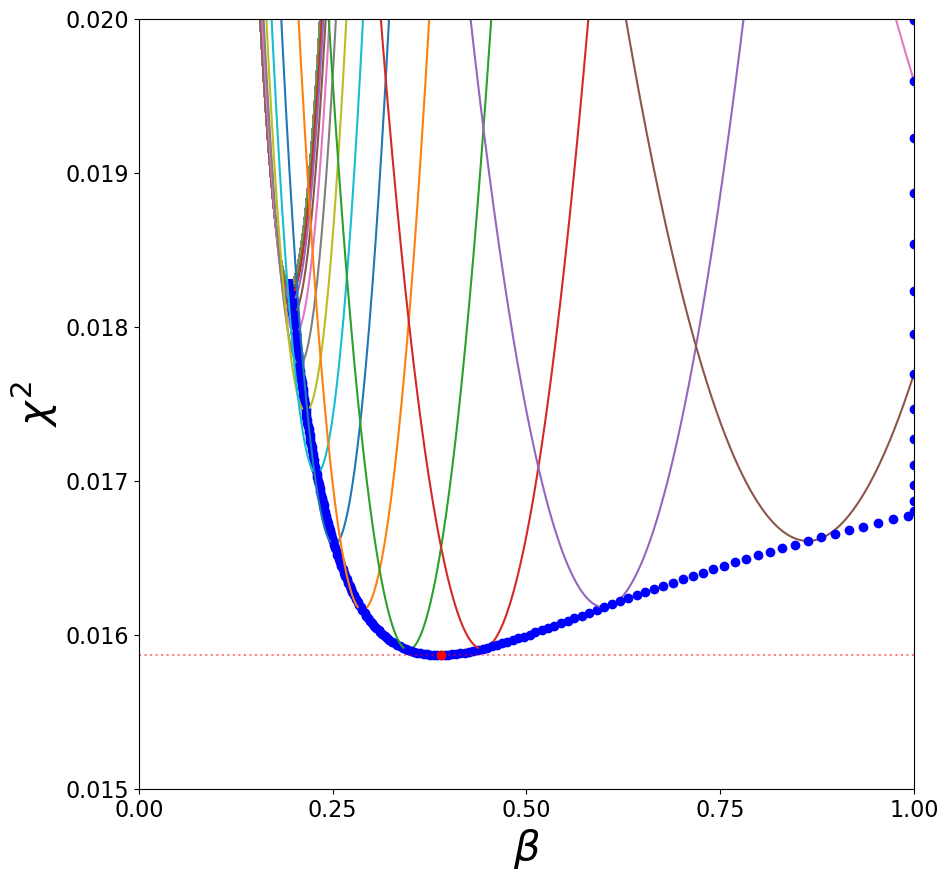

In [12]:
fig = plt.figure(1,figsize=(10,10))
# camera = Camera(fig)
x = np.row_stack((log_M,T))

N = 1000
TT = np.logspace(-6,6,N)
c_T_all_Model2 = np.zeros(N)
cc = np.linspace(0,1,N)
b_M_all_Model2 = np.zeros((N,N))
resM2 = np.zeros((N,N))
a_all_Model2 = np.zeros((N,N))
resM2_Min = np.zeros(N)

beta2 = np.zeros(N)
zz = 0
for ii, t0 in tqdm(enumerate(TT)):
    for jj, be in enumerate(cc):
        def linfit(beta,x):
            return beta[0] + beta[1]*x[0] + be*np.log10(1+x[1]/t0)
        linmod = Model(linfit)
        data = RealData(x,log_R)
        odr = ODR(data,linmod,beta0=[1.,1.])
        out=odr.run()
        a_all_Model2[ii,jj],b_M_all_Model2[ii,jj] = out.beta
        resM2[ii,jj] = out.sum_square


    if (zz % 20) == 0:        
        plt.plot(cc,resM2[ii,:])
    zz += 1
    bb = resM2[ii,:].argmin()
    plt.plot(cc[bb],resM2[ii,bb],'bo')
    resM2_Min[ii] = resM2[ii,bb]
    beta2[ii] = cc[bb] 

    plt.xticks(np.linspace(0,1,5))
#     plt.yticks(np.linspace(0.03425,0.03545,5))
    # plt.ylim(290,310)
    plt.ylim(0.015,0.02)
    plt.xlim(0,1)
    plt.xlabel(r'$\beta$',fontsize=30)
    plt.ylabel(r"$\chi^2 $",fontsize=30)
    # plt.text(0.02,0.0345,s='T = {:.4f}'.format(t0))
    # plt.tight_layout()
    # camera.snap()  # 애니메이션에 추가
    # fig
    
plt.ylim(0.015,0.02)
# plt.text(0.05,0.03575,'(c)')    
tt = np.unravel_index(resM2.argmin(),resM2.shape)
uu_2 , beta0_2 = tt
plt.plot(cc[beta0_2], resM2[uu_2,beta0_2],'ro') # label=r'$T_0$ ={:.2f}'.format(TT[qq])
plt.axhline(y=resM2[uu_2,beta0_2],ls=':',c='r',alpha=0.5)
#plt.legend()
print('Chi2  =  ',resM2[uu_2,beta0_2])
print('-'*50)
print('beta of using \'for \'   =  ',cc[beta0_2] )
print('-'*50)
# print('beta of using \' best fit \'   =  ',c_T_all_Model2[uu_2] )
# print('-'*50)
print('alpha   =  ',b_M_all_Model2[uu_2,beta0_2])
print('-'*50)
print('T0 = ',TT[uu_2])
print('-'*50)
print('R0   =  ',a_all_Model2[uu_2,beta0_2])

# plt.savefig("/home/jin/바탕화면/Relation 2 사진",bbox_inches = 'tight' )


In [13]:
Rdot_2 = 10**(a_all_Model2[uu_2,beta0_2])*M**(b_M_all_Model2[uu_2,beta0_2])*(1+T/TT[uu_2])**(beta2[uu_2])
Rnew_2 = R/(1+T/TT[uu_2])**(beta2[uu_2])

R2 = R/((1+T/TT[uu_2])**(beta2[uu_2]))


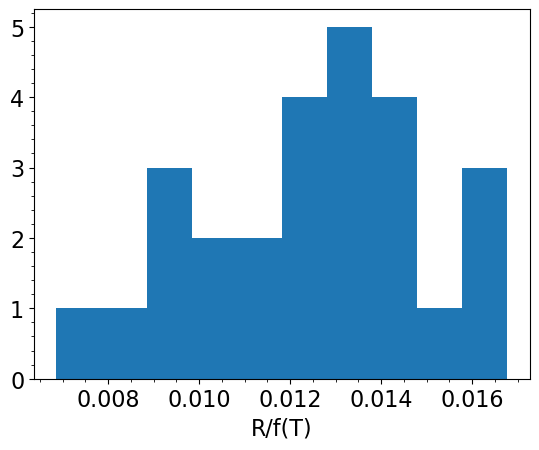

In [14]:
plt.hist(R2) 
plt.xlabel('R/f(T)')
R2.std()
plt.minorticks_on()

0.010271846739702589


C:\Users\wlsdl\AppData\Local\Temp\ipykernel_20272\3189176081.py:54: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\wlsdl\AppData\Local\Temp\ipykernel_20272\3189176081.py:96: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


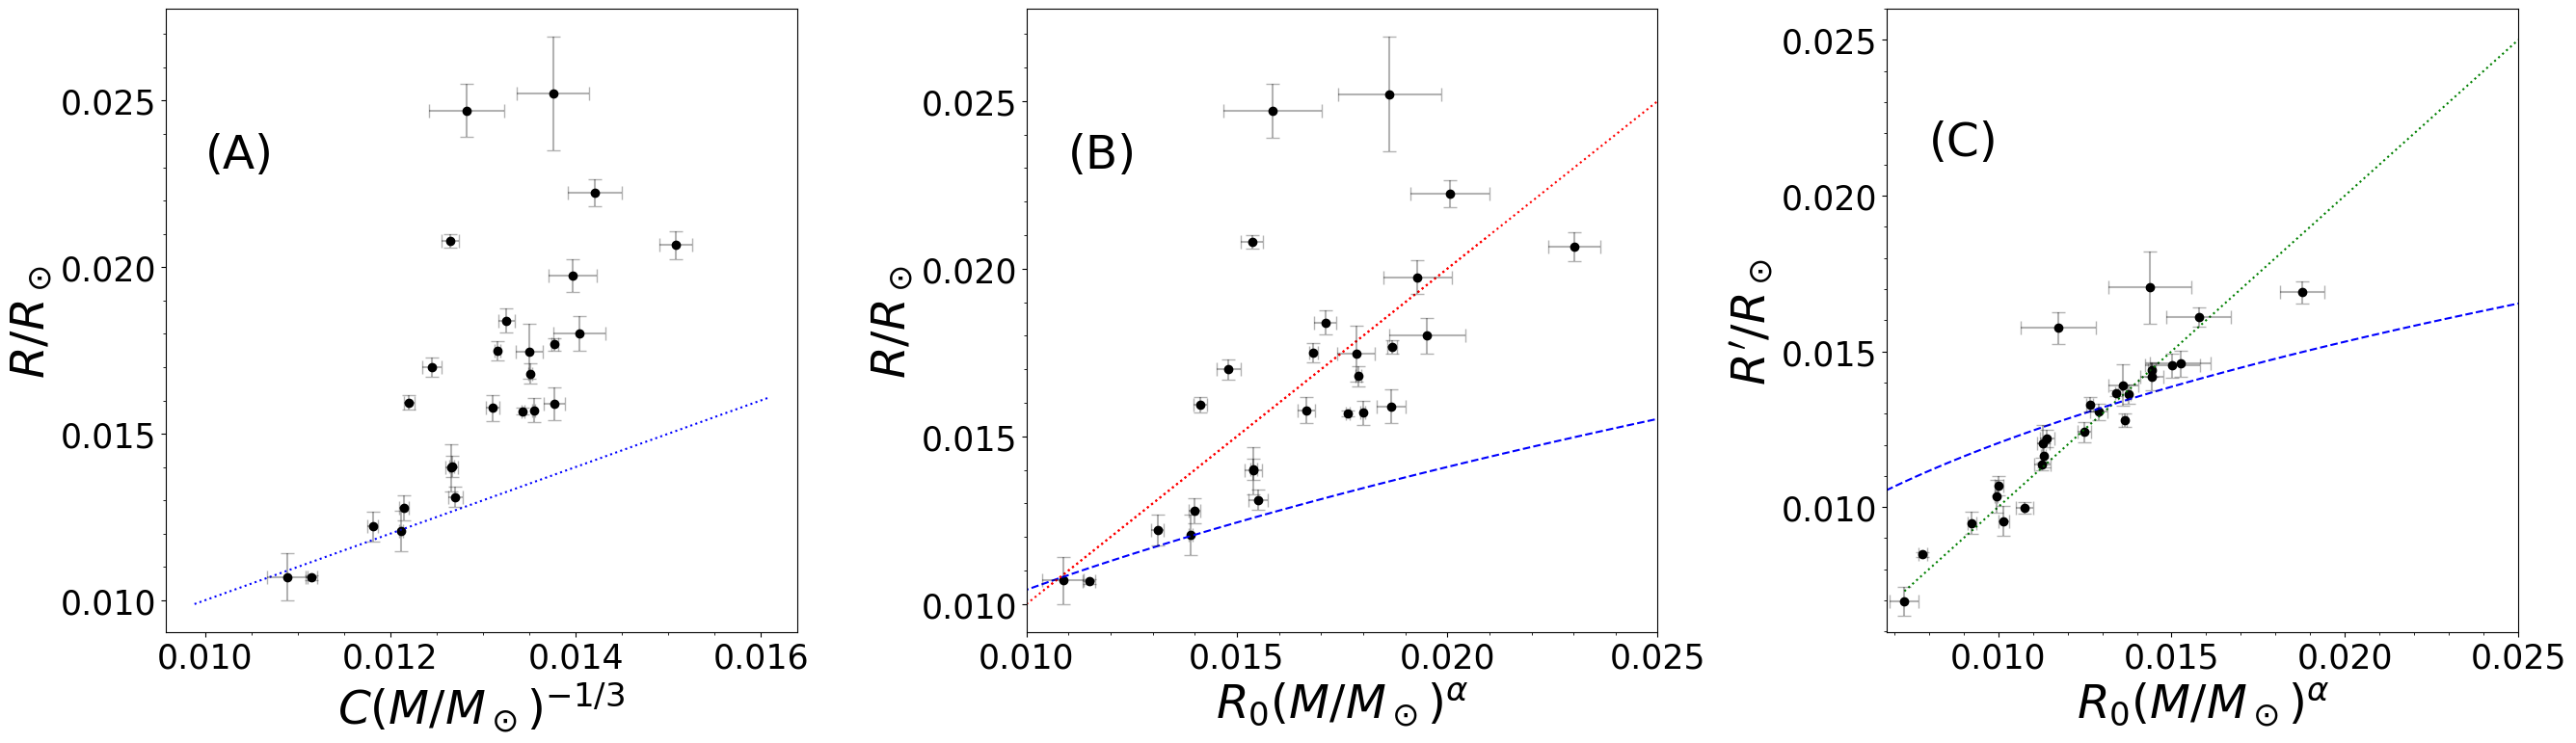

In [37]:
fig = plt.figure(1,figsize=(27,8))

s_n = 35


plt.subplot(131)
yy_th = EOS(M,0.5)   # ratio of proton and Atomic numer 0.5 = ratio of proton and neutron 1
plt.plot(yy_th,R,'ko')
tx = np.linspace(yy_th.min()-0.001,yy_th.max()+0.001,100)
plt.plot(tx,tx,'b:')

plt.xlabel(r'$C(M/M_\odot)^{-1/3}$',fontsize=35)
plt.ylabel(r'$R/R_\odot$',fontsize=35)
plt.yticks([0.01,0.015,0.020,0.025])
plt.xticks([0.01,0.012,0.014,0.016])
plt.text(0.01,0.023,'(A)',size=s_n )

C = 0.010271846739702589
M_1_err = abs(C*(M)**(-1/3)*(-1/3)*(Merr/M))

plt.errorbar(x=yy_th,y=R,xerr =M_1_err,yerr=Rerr,ls='',capsize=5,alpha=0.3,c='k')

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.minorticks_on()
plt.tight_layout()


plt.subplot(132)
R_M = 10**M_1[1]*M**(M_1[0])
x = np.linspace(0.01,0.025,100)
plt.plot(R_M,R,'ko')

plt.plot(x,x,'r:')

mm = np.linspace(M.min()-0.2 ,M.max()+0.1,100)
iu = 10**M_1[1]*mm**(M_1[0])
tx = 0.0102*mm**(-1/3)
plt.plot(iu,tx,'b--')

plt.xlabel(r'$R_0(M/M_\odot)^\alpha$',fontsize=35)
plt.ylabel(r'$R/R_\odot$',fontsize=35)
plt.text(0.011,0.023,'(B)',size=s_n )
plt.yticks([0.01,0.015,0.020,0.025])
plt.xticks([0.01,0.015,0.020,0.025])
plt.xlim(x.min(),x.max())
plt.plot(tx,tx,'r:')

M_2_err = abs(R_M*(M_1[0])*(Merr/M))
plt.errorbar(x=R_M,y=R,xerr =M_2_err,yerr=Rerr,ls='',capsize=5,alpha=0.3,c='k')
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.minorticks_on()
plt.tight_layout()

plt.subplot(133)
alpha_2 = -0.966
t0_2 = 18686
beta_2 = 0.409
r0_2 = -2.21
MCR = R/(1+T/t0_2)**beta_2
xx = 10**r0_2*M**alpha_2
plt.plot(xx,MCR,'ko')
x = np.linspace(xx.min(),0.025,100)
plt.plot(x,x,'g:')
# plt.ylabel(r'$R/f(T)$',fontsize=35)
plt.ylabel(r"$R^\prime/R_\odot$",fontsize=35)
plt.xlabel(r'$R_0(M/M_\odot)^\alpha$',fontsize=35)

mm_2 = np.linspace(0+0.00001 ,M.max()+0.1,100)
iu_2 = 10**r0_2*mm_2**alpha_2
tx = 0.0102*mm_2**(-1/3)
plt.plot(iu_2,tx,'b--')


del_ft = (1+T/t0_2)**beta_2 * beta_2 * ((Terr/t0_2) / ((1+T/t0_2)))


R_3_err = MCR*np.sqrt((Rerr/R)**2 +  (Terr*beta_2 / (T+t0_2))**2  )

M_3_err = abs(xx*(alpha_2)*(Merr/M))
plt.errorbar(x=xx,y=MCR,xerr =M_3_err,yerr=R_3_err,ls='',capsize=5,alpha=0.3,c='k')



plt.xlim(xx.min()-0.0005,0.02)
plt.ylim(MCR.min()-0.001,0.026)
plt.text(0.008,0.0213,'(C)',size=s_n )
plt.yticks([0.01,0.015,0.02,0.025])
plt.xticks([0.01,0.015,0.02,0.025])

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.minorticks_on()
plt.tight_layout()


# plt.savefig("/home/jin/바탕화면/Three_com_result",dpi=400 ,bbox_inches = 'tight' )

# error propagation


(A)

$C(M+\sigma_{M})^{-1/3} = C(M)^{-1/3} (1 + \sigma_M/M)^{-1/3} = C(M)^{-1/3} + \Delta{M}_1$

$\Delta{M_1} = -1/3 \times  C(M)^{-1/3} \times (\sigma_M/M)$

(B)

$R_0(M+\sigma_M)^{\alpha} = R(M)^{\alpha} (1 + \sigma_M/M)^{\alpha} = R_0(M)^{\alpha} + \Delta{M_2}$

$\Delta{M_2} = \alpha \times R_0(M)^{\alpha} \times (\sigma_M/M)$


(c)

$\frac{R}{f(T)}$


$\Delta {y} = (R/f(T))  \times \sqrt{ (\Delta{f(T)}/f(T))^2 + (\Delta{R}/R)^2 }$

$\Delta{f(T)} = f(T) \times \beta \times (\Delta{T}/(1+T/T_0)) $

$R_0(M+\sigma_M)^{\alpha} = R(M)^{\alpha} (1 + \sigma_M/M)^{\alpha} = R_0(M)^{\alpha} + \Delta{M_3}$

$\Delta{M_3} = \alpha \times R_0(M)^{\alpha} \times (\sigma_M/M)$

# Model 3

In [16]:

# fig = plt.figure(1,figsize=(10,10))
# camera = Camera(fig)
# x = np.row_stack((log_M,T))


# N = 1000
# TT = np.logspace(-5,5,N)
# c_T_all_Model3 = np.zeros(N)
# cc = np.linspace(0,1,N)
# b_M_all_Model3 = np.zeros(N)
# resM3 = np.zeros((N,N))
# a_all_Model3 = np.zeros(N)
# beta3 = np.zeros(N)
# resM3_Min = np.zeros(N)
# zz=0
# for ii, t0 in  tqdm(enumerate(TT)):
#     def linfit(beta,x):
#         return beta[0] + beta[1]*x[0] + np.log10(1+(x[1]/t0)**beta[2])
#     linmod = Model(linfit)
#     data = RealData(x,log_R)
#     odr = ODR(data,linmod,beta0=[1.,1.,1.])
#     out=odr.run()
#     zz+=1
#     a_all_Model3[ii],b_M_all_Model3[ii],c_T_all_Model3[ii] = out.beta
#     for jj, beta in enumerate(cc):
#         R_test = np.log10(R/(1+(T/t0)**(beta)))
#       #res[ii,jj] = np.sum((R_test -b_M_all_Model4[ii]*log_M-a_all_Model4[ii])**2)
#         resM3[ii,jj] = np.std(R_test -b_M_all_Model3[ii]*log_M)
#     if (zz % 20) == 0:        
#         plt.plot(cc,resM3[ii,:])
#     bb = resM3[ii,:].argmin()
#     plt.plot(cc[bb],resM3[ii,bb],'bo')
#     resM3_Min[ii] = resM3[ii,bb]
#     beta3[ii] = cc[bb]
# #     plt.xticks(np.linspace(0,1,5))
# #     plt.yticks(np.linspace(0.0345,0.0360,5))
# #     plt.ylim(0.0345,0.0360)
#     plt.xticks(np.linspace(0,1,5))
#     plt.yticks(np.linspace(0.03465,0.03595,5))
#     plt.ylim(0.0346,0.036)
#     plt.xlabel(r'$\beta$',fontsize=30)
#     plt.ylabel(r" STD$[\log({\mathcal{R}'})]$",fontsize=30)
#     # plt.text(0.02,0.035,s='T = {:.4f}'.format(t0))
#     # camera.snap()  # 애니메이션에 추가
#   # fig
#   # plt.tight_layout()

    
# # plt.text(0.05,0.03575,'(d)')     
# tt = np.unravel_index(resM3.argmin(),resM3.shape)
# uu_3 , beta0_3 = tt
# plt.plot(cc[beta0_3], resM3[uu_3,beta0_3],'ro') #,label=r'$T_0$ ={:.2f}'.format(TT[kk])
# plt.axhline(y=resM3[uu_3,beta0_3],ls=':',c='r',alpha=0.5)
# #plt.legend()

# print('Std  =  ',resM3[uu_3,beta0_3])
# print('-'*50)
# print('beta of using \'for \'   =  ',cc[beta0_3] )
# print('-'*50)
# print('beta of using \' best fit \'   =  ',c_T_all_Model3[uu_3] )
# print('-'*50)
# print('alpha   =  ',b_M_all_Model3[uu_3])
# print('-'*50)
# print('T0 = ',TT[uu_3])
# print('-'*50)
# print('R0   =  ',a_all_Model3[uu_3])

# # plt.savefig("/home/jin/바탕화면/Relation 3 사진",bbox_inches = 'tight' )

0it [00:00, ?it/s]

Std  =   0.016094825533636614
--------------------------------------------------
beta of using 'for '   =   0.6896896896896897
--------------------------------------------------
alpha   =   -0.9705027908085332
--------------------------------------------------
T0 =  66500.18030431132
--------------------------------------------------
R0   =   -2.230847995814766


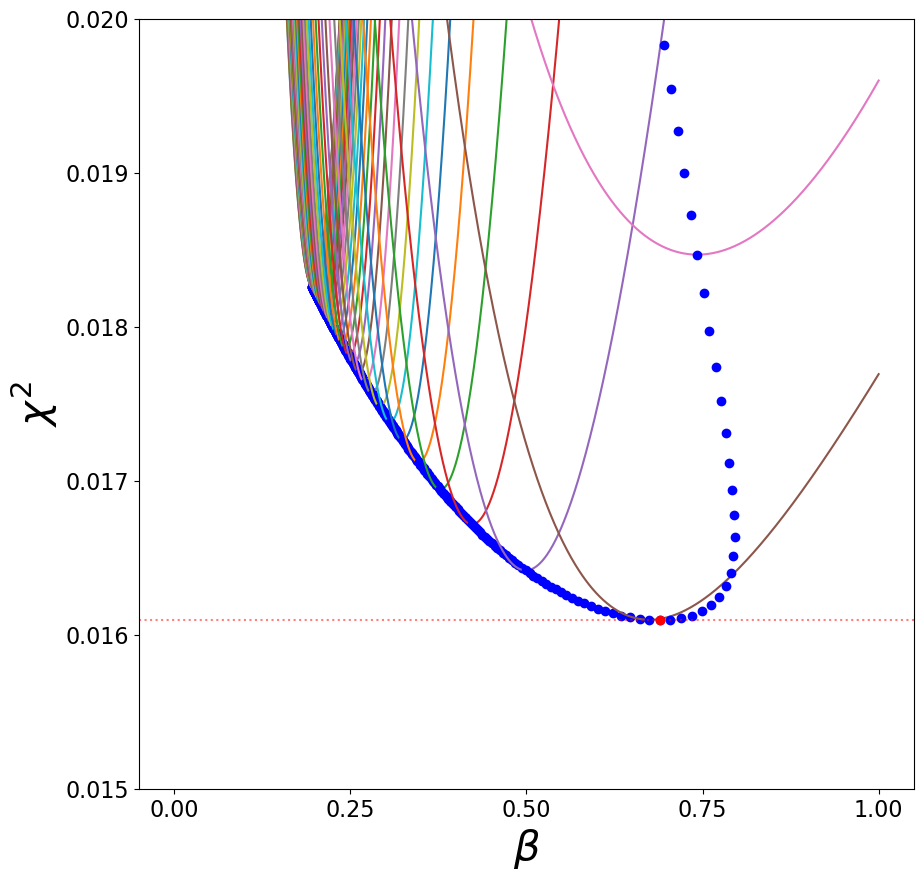

In [17]:

fig = plt.figure(1,figsize=(10,10))
# camera = Camera(fig)
x = np.row_stack((log_M,T))


N = 1000
TT = np.logspace(-6,6,N)
c_T_all_Model3 = np.zeros(N)
cc = np.linspace(0,1,N)
b_M_all_Model3 = np.zeros((N,N))
resM3 = np.zeros((N,N))
a_all_Model3 = np.zeros((N,N))
beta3 = np.zeros(N)
resM3_Min = np.zeros(N)
zz=0
for ii, t0 in  tqdm(enumerate(TT)):
    for jj, be in enumerate(cc):
        def linfit(beta,x):
            return beta[0] + beta[1]*x[0] + np.log10(1+(x[1]/t0)**be)
        linmod = Model(linfit)
        data = RealData(x,log_R)
        odr = ODR(data,linmod,beta0=[1.,1.])
        out=odr.run()

        a_all_Model3[ii,jj] , b_M_all_Model3[ii,jj] = out.beta
        resM3[ii,jj] = out.sum_square
    
    if (zz % 20) == 0:        
        plt.plot(cc,resM3[ii,:])
    zz+=1
    bb = resM3[ii,:].argmin()
    plt.plot(cc[bb],resM3[ii,bb],'bo')
    resM3_Min[ii] = resM3[ii,bb]
    beta3[ii] = cc[bb]
#     plt.xticks(np.linspace(0,1,5))
#     plt.yticks(np.linspace(0.0345,0.0360,5))
#     plt.ylim(0.0345,0.0360)
    plt.xticks(np.linspace(0,1,5))
#     plt.yticks(np.linspace(0.03465,0.03595,5))
    plt.ylim(0.015,0.020)   
    plt.xlabel(r'$\beta$',fontsize=30)
    plt.ylabel(r"$\chi^2$",fontsize=30)
    # plt.text(0.02,0.035,s='T = {:.4f}'.format(t0))
    # camera.snap()  # 애니메이션에 추가
  # fig
  # plt.tight_layout()

    
# plt.text(0.05,0.03575,'(d)')  
plt.ylim(0.015,0.020)   
tt = np.unravel_index(resM3.argmin(),resM3.shape)
uu_3 , beta0_3 = tt
plt.plot(cc[beta0_3], resM3[uu_3,beta0_3],'ro') #,label=r'$T_0$ ={:.2f}'.format(TT[kk])
plt.axhline(y=resM3[uu_3,beta0_3],ls=':',c='r',alpha=0.5)
#plt.legend()

print('Std  =  ',resM3[uu_3,beta0_3])
print('-'*50)
print('beta of using \'for \'   =  ',cc[beta0_3] )
print('-'*50)
# print('beta of using \' best fit \'   =  ',c_T_all_Model3[uu_3] )
# print('-'*50)
print('alpha   =  ',b_M_all_Model3[uu_3,beta0_3])
print('-'*50)
print('T0 = ',TT[uu_3])
print('-'*50)
print('R0   =  ',a_all_Model3[uu_3,beta0_3])

# plt.savefig("/home/jin/바탕화면/Relation 3 사진",bbox_inches = 'tight' )

In [18]:
Rdot_3 = 10**(a_all_Model3[uu_3,beta0_3])*M**(b_M_all_Model3[uu_3,beta0_3])*(1+(T/TT[uu_3])**(beta3[uu_3]))
Rnew_3 = R/(1+(T/TT[uu_3])**(beta3[uu_3]))

R3 = R/((1+(T/TT[uu_3])**(beta3[uu_3])))

0.0023622644972332587

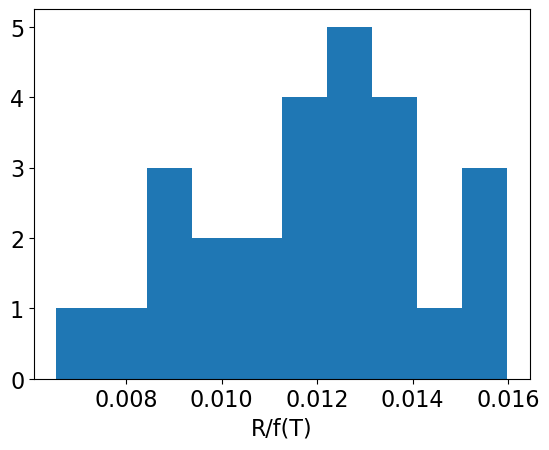

In [19]:
plt.hist(R3) 
plt.xlabel('R/f(T)')
R3.std()

# Result

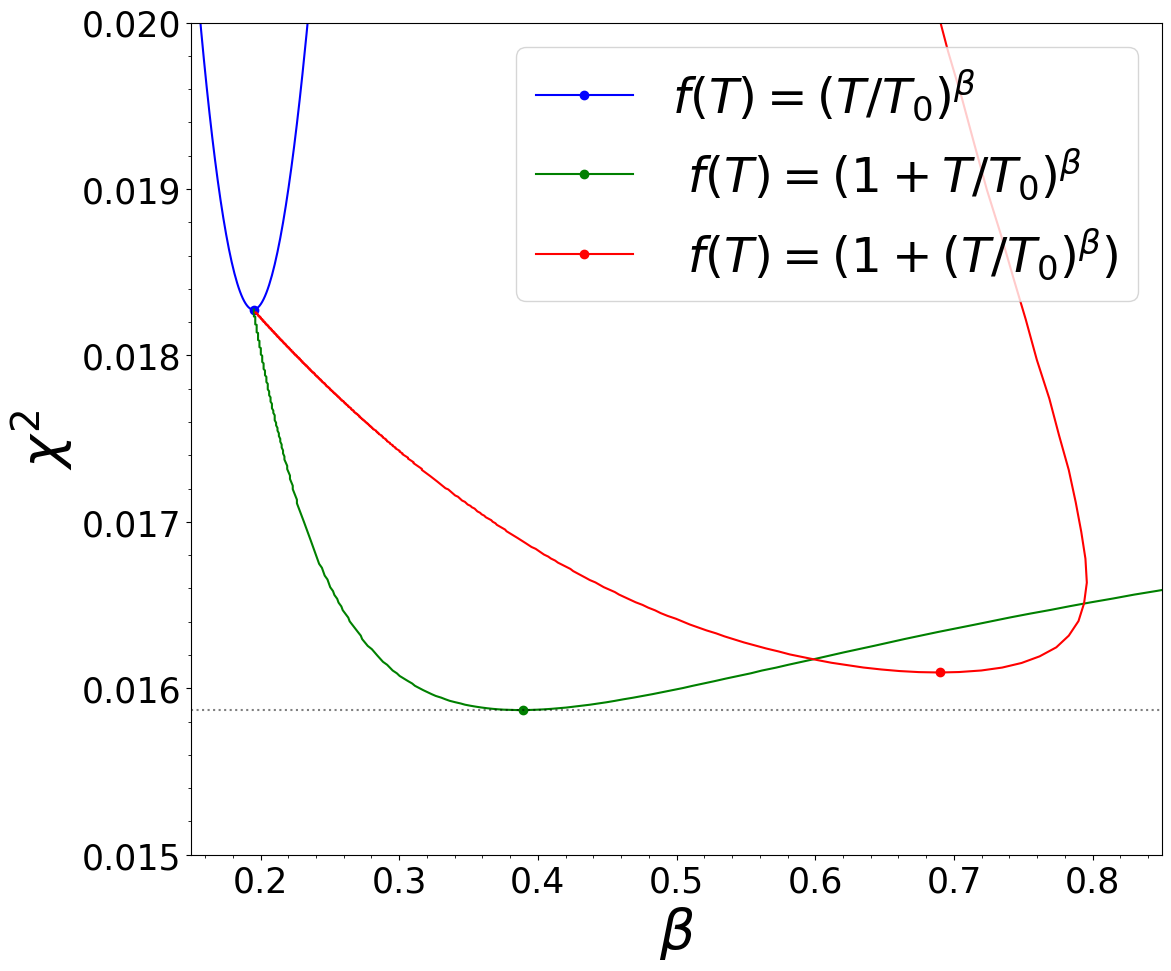

In [28]:
fig = plt.figure(1,figsize=(12,10))

# Rlog_t = (-1/3)*log_M + a_th
# sst = np.std(log_R-Rlog_t )
# print('M-R relation of M over -1/3 = ',sst)

# ss1 = np.std(log_R-Rlog_1 )
# print('M-R relation of M fitting = ',ss1)



plt.plot(cc,resM1[uu_1,:],'b-')
plt.plot(beta1[beta0_1],resM1_Min[uu_1],'bo-',label=r'$f(T) =(T/T_0)^\beta $') 
# plt.text(beta1[beta0_1]+0.01,resM1_Min[uu_1],'(A)')

plt.plot(beta2,resM2_Min,'g-')
plt.plot(beta2[uu_2],resM2_Min[uu_2],'go-',label = r' $f(T) = (1+T/T_0)^\beta $' ) 

plt.plot(beta3,resM3_Min,'r-')
plt.plot(beta3[uu_3],resM3_Min[uu_3],'ro-', label = r' $f(T) = (1+(T/T_0)^\beta) $' ) 


plt.axhline(y =resM2_Min[uu_2],alpha= 0.5 ,ls=':',c='k')
plt.xlim(0.15,0.85)
# plt.xticks(np.arange(0.15,0.85,0.2))
plt.ylim(0.015,0.02)
# plt.yticks(np.linspace(0.03025,0.03685,4))
plt.xlabel(r'$\beta$',fontsize=40)
plt.ylabel(r'$\chi^2$',fontsize=40)
# plt.ylabel(r'Residual',fontsize=40)
plt.minorticks_on()
# plt.title(r'R$^\prime$ = R $/f(T) $')

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.legend(fontsize=35,loc='upper right')

plt.tight_layout()
# plt.savefig(r'C:/Users/wlsdl/OneDrive/바탕 화면/White Dwarf/Result Comparing STD each relation')  #box_inches = 'tight'

chi2

0.010271846739702589
10.795883869228108
**************************************************
13.09688212954821


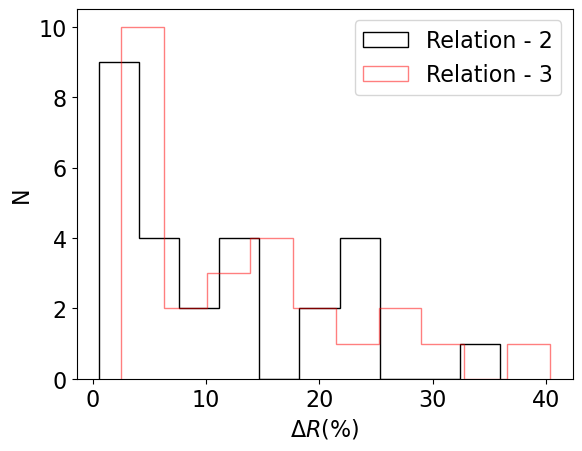

In [21]:
def EOS(m,z):
    aa = (m_s)**(-1/3) / r_s
    pp = aa*kk_e*mp**(-5/3)
    k = pp*z**(5/3)
    print(k)
    return k * m **(-1/3)

R_th = EOS(M,0.5)

alpha_2_c = -0.966
t0_2_c = 18686
beta_2_c = 0.409
# R_rel = np.log10(R/(1+T/t0)**(beta))


alpha_3_c = -0.967
t0_3_c = 64718
beta_3_c = 0.690

# res = np.std(R_rel -alpha*log_M)

# print(res)
R2_MC = R/(1+T/t0_2_c)**beta_2_c
R3_MC = R/(1+(T/t0_3_c)**beta_3_c)
rat2= abs(R_th-R2_MC)/R_th
plt.hist(rat2*100 ,bins=10,color='k',alpha = 1,histtype='step' , label='Relation - 2')
print(rat2.mean()*100)

print('*'*50)
rat3= abs(R_th-R3_MC)/R_th
plt.hist(rat3*100 , bins=10,color='r',alpha = 0.5,histtype='step', label='Relation - 3')

plt.xlabel(r"$\Delta R$(%)")
plt.ylabel('N')
print(rat3.mean()*100)
plt.legend()

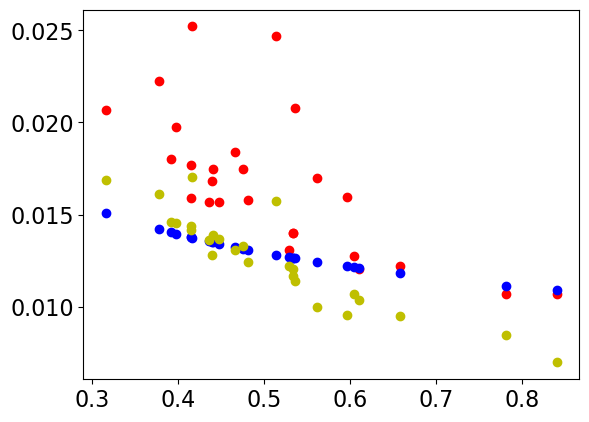

In [22]:
plt.plot(M,R,'ro')
plt.plot(M,R_th,'bo')
plt.plot(M,R2_MC,'yo')

In [23]:
rat2= abs(R_th-R2_MC)
r_m2 = rat2.mean()
rat2_sig= np.std(R_th-R2_MC)


rat3= abs(R_th-R3_MC)
r_m3 = rat3.mean()
rat3_sig= np.std(R_th-R3_MC)

a=r_m2/rat2_sig
b=r_m3/rat3_sig
print(a,b)
print(rat2_sig,rat3_sig)

0.7977038966076941 1.0567739944873538
0.0016972913346538108 0.0015376734049888578


STD

0.03434885942752827
10.767767007929066
0.09426615379273987
**************************************************
13.342182916994815


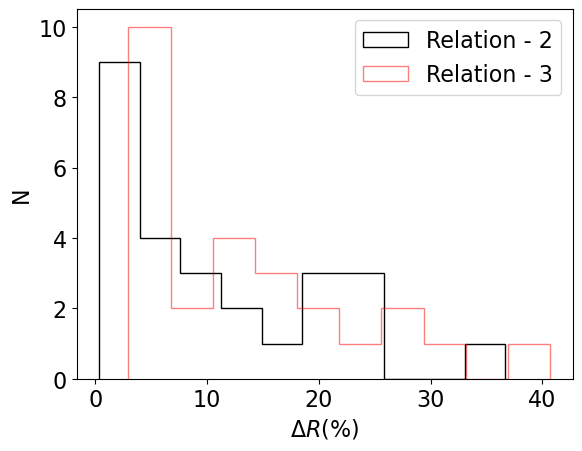

In [24]:
alpha_2_s = -0.965
t0_2_s = 15397
beta_2_s = 0.374
R_rel = np.log10(R/(1+T/t0_2_s)**(beta_2_s))


alpha_3_s = -0.966
t0_3_s = 63749
beta_3_s = 0.685

res = np.std(R_rel -alpha_2_s*log_M)

print(res)
R2_MC = R/(1+T/t0_2_s)**beta_2_s
R3_MC = R/(1+(T/t0_3_s)**beta_3_s)
rat2= abs(R_th-R2_MC)/R_th
plt.hist(rat2*100 ,bins=10,color='k',alpha = 1,histtype='step' , label='Relation - 2')
print(rat2.mean()*100)
print(rat2.std())

print('*'*50)
rat3= abs(R_th-R3_MC)/R_th
plt.hist(rat3*100 , bins=10,color='r',alpha = 0.5,histtype='step', label='Relation - 3')

plt.xlabel(r"$\Delta R$(%)")
plt.ylabel('N')
print(rat3.mean()*100)
plt.legend()

In [25]:
rat2= abs(R-R2_MC)
r_m2 = rat2.mean()
rat2_sig= np.std(R-R2_MC)


rat3= abs(R-R3_MC)
r_m3 = rat3.mean()
rat3_sig= np.std(R-R3_MC)

a=r_m2/rat2_sig
b=r_m3/rat3_sig
print(a,b)
print(rat2_sig,rat3_sig)

1.8205504781517001 2.069072430399454
0.002313947872707397 0.0024008609170362554


99.999 6.677166084199213
99.999 7.043236582461532
99.999 7.3271829205751375
99.999 7.5591839714946785
99.999 7.755338065112375
99.999 7.9252544697569975
99.999 8.075131360527823
99.999 8.209200807870602
99.999 8.330481375384203
99.999 8.441201858790144


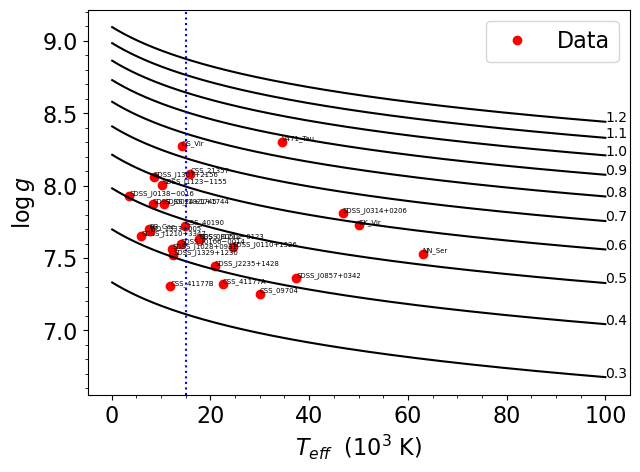

In [26]:
R_0 = -2.214
al = -0.965
be = 0.375
t_0 = 15397

# R_2_mc = 10**R_0*M**al*(1+T/t_0)**be
fig = plt.figure(1,figsize=(7,5))
g_r = np.log10(G*M*m_s / (R*r_s)**2)
plt.plot(T/1000,g_r+2,'ro',label='Data')
for i,name in enumerate(Object):
    plt.text(T[i]/1000,g_r[i]+2.01,'{0}'.format(name),size=5)

T_t = np.arange(100,100000,1)
M_m = np.arange(0.3,1.3,0.1)
for i in M_m:
    g = np.zeros(len(T_t))
    R_2_mc  = np.zeros(len(T_t))
    R_2_mc = 10**R_0*i**al*(1+T_t/t_0)**be
    R_2_mc_e = R_2_mc * r_s
    M_e = i * m_s
    g = G*M_e / R_2_mc_e**2
    g = np.log10(g) + 2 
    x_l,y_l = T_t[-1]/1000 , g[-1]
    print(x_l,y_l)
    plt.text(x_l,y_l,'{:.1f}'.format(i),size=10)
    plt.ylabel(r'$\log g$')
    plt.xlabel(r'$T_{eff}$  ($10^3$ K)')
    plt.plot(T_t/1000,g,'k-')
    # plt.yticks([6.0,7.0,8.0,9.0,10.0])
    plt.minorticks_on()

plt.axvline(15,0,10,linestyle=':',color='b')
plt.legend()

In [27]:
cool = pd.read_csv(r'C:/Users/wlsdl/OneDrive/바탕 화면/White Dwarf/0.3_pureH.txt ',delim_whitespace=True,header=0)
Te_c = cool['Teff'].to_numpy()
logg_c = cool['log'].to_numpy()



FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/wlsdl/OneDrive/바탕 화면/White Dwarf/0.3_pureH.txt '

99.999 6.677166084199213
99.999 7.043236582461532
99.999 7.3271829205751375
99.999 7.5591839714946785
99.999 7.755338065112375
99.999 7.9252544697569975
99.999 8.075131360527823
99.999 8.209200807870602
99.999 8.330481375384203
99.999 8.441201858790144


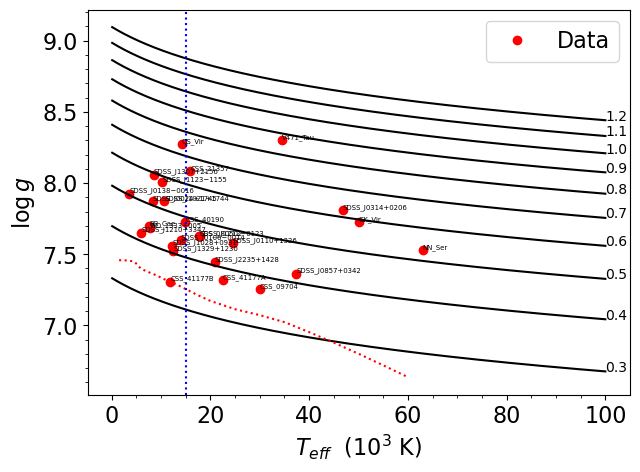

In [ ]:
R_0 = -2.214
al = -0.965
be = 0.375
t_0 = 15397

# R_2_mc = 10**R_0*M**al*(1+T/t_0)**be
fig = plt.figure(1,figsize=(7,5))
g_r = np.log10(G*M*m_s / (R*r_s)**2)
plt.plot(T/1000,g_r+2,'ro',label='Data')
for i,name in enumerate(Object):
    plt.text(T[i]/1000,g_r[i]+2.01,'{0}'.format(name),size=5)

T_t = np.arange(100,100000,1)
M_m = np.arange(0.3,1.3,0.1)
for i in M_m:
    g = np.zeros(len(T_t))
    R_2_mc  = np.zeros(len(T_t))
    R_2_mc = 10**R_0*i**al*(1+T_t/t_0)**be
    R_2_mc_e = R_2_mc * r_s
    M_e = i * m_s
    g = G*M_e / R_2_mc_e**2
    g = np.log10(g) + 2 
    x_l,y_l = T_t[-1]/1000 , g[-1]
    print(x_l,y_l)
    plt.text(x_l,y_l,'{:.1f}'.format(i),size=10)
    plt.ylabel(r'$\log g$')
    plt.xlabel(r'$T_{eff}$  ($10^3$ K)')
    plt.plot(T_t/1000,g,'k-')
    # plt.yticks([6.0,7.0,8.0,9.0,10.0])
    plt.minorticks_on()

plt.plot(Te_c/1000,logg_c,'r:')
plt.axvline(15,0,10,linestyle=':',color='b')
plt.legend()